In [1]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
academic = pd.read_csv('CSV/academic.csv')
advising = pd.read_csv('CSV/advising.csv')
atis = pd.read_csv('CSV/atis.csv')
geo = pd.read_csv('CSV/geo.csv')
imdb = pd.read_csv('CSV/imdb.csv')
restaurants = pd.read_csv('CSV/restaurants.csv')
scholar = pd.read_csv('CSV/scholar.csv')
spider = pd.read_csv('CSV/spider.csv')
wikisql = pd.read_csv('CSV/wikisql.csv')
yelp = pd.read_csv('CSV/yelp.csv')
medical = pd.read_csv("CSV/data_medical.csv")
df_tsv = pd.read_csv("CSV/all_questions.csv")
cosql = pd.read_csv("CSV/cosql.csv")

data_list = [academic, advising, atis, geo, imdb, restaurants, scholar, spider, wikisql, yelp, medical, df_tsv]
 
names = ['academic', 'advising', 'atis', 'geo', 'imdb', 'restaurants', 'scholar', 'spider', 'wikisql', 'yelp', 'medical' ,
        'train_spider', 'test_spider', 'train_others', 'train_sparc','test_spark', 'cosql_all']

In [3]:
def description(data, words, names):
    for word in words:
          data[word] = data.sql.str.count(word)
    data_info = pd.DataFrame()
    result = pd.DataFrame()
    sql = data['sql'].str.upper().str.split()
    question = data['question'].str.upper().str.split()
    data['sqlSplit'] = sql
    data['questionSplit'] = question
    data['questionUniqueCounter'] = question.apply(set).apply(len)
    data['sqlUniqueCounter'] = sql.apply(set).apply(len)
    for name in names:
        data_new = data[data['source'] == name]
              
        data_info['mean_len_sql'] = [data_new['sqlUniqueCounter'].mean()]
        data_info['median_len_sql'] = [data_new['sqlUniqueCounter'].median()]
        data_info['std_len_sql'] = [data_new['sqlUniqueCounter'].std()]    
        data_info['mean_len_question'] = [data_new['questionUniqueCounter'].mean()]
        data_info['median_len_question'] = [data_new['questionUniqueCounter'].median()]
        data_info['std_len_question'] = [data_new['questionUniqueCounter'].std()]
        data_info['source'] = name
        result = pd.concat([result,data_info], axis=0, join='outer', ignore_index=False)
    
    return result

In [4]:
medical.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
def number_of_keyWords(data,words,names):
    data_keywords = pd.DataFrame()
    result = pd.DataFrame()
    for name in names:
        filtered_by_source = data[data['source'] == name]
        for word in words:
            data_keywords[word] = [filtered_by_source[word].sum()]
        data_keywords['source'] = name
        result = pd.concat([result,data_keywords], axis=0, join='outer', ignore_index=False)
    return result

In [6]:
words = ['SELECT','WHERE','FROM','JOIN', 'HAVING','LIKE','GROUP BY','COUNT','DISTINCT','MIN','MAX','AVG',
         'ORDER BY', 'DATE','LIMIT']


In [7]:
final_df = pd.concat([academic, advising, atis, geo, imdb, restaurants, scholar, spider, wikisql, yelp, medical, df_tsv], axis=0, join='outer', ignore_index=False)

In [8]:
final_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [9]:
final_df = final_df.drop_duplicates(subset=['question'])

In [10]:
description_df = description(final_df, words, names)

In [11]:
data_keywords = number_of_keyWords(final_df, words, names)

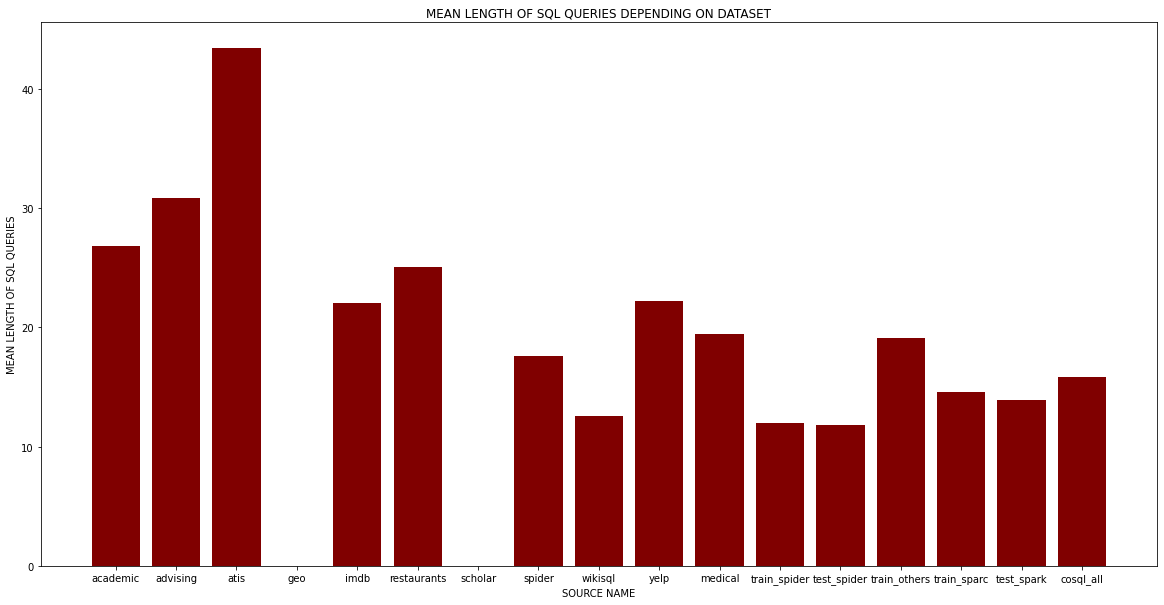

In [12]:
fig = plt.figure(figsize = (20, 10))
plt.bar(description_df['source'], description_df['mean_len_sql'], color ='maroon',
        width = 0.8)
plt.xlabel("SOURCE NAME")
plt.ylabel("MEAN LENGTH OF SQL QUERIES")
plt.title("MEAN LENGTH OF SQL QUERIES DEPENDING ON DATASET")
plt.show()

In [13]:
final_df[final_df['source'] == 'geo']

,question,source,sql,SELECT,WHERE,FROM,JOIN,HAVING,LIKE,GROUP BY,...,MIN,MAX,AVG,ORDER BY,DATE,LIMIT,sqlSplit,questionSplit,questionUniqueCounter,sqlUniqueCounter


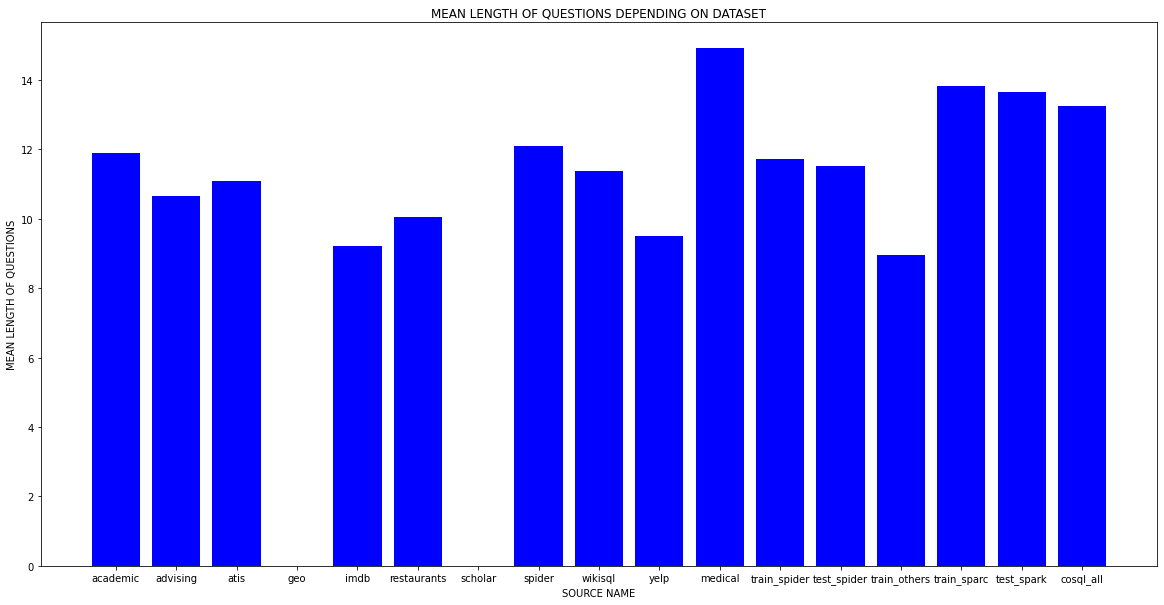

In [14]:
fig = plt.figure(figsize = (20, 10))
plt.bar(description_df['source'], description_df['mean_len_question'], color ='blue',
        width = 0.8)
plt.xlabel("SOURCE NAME")
plt.ylabel("MEAN LENGTH OF QUESTIONS")
plt.title("MEAN LENGTH OF QUESTIONS DEPENDING ON DATASET")
plt.show()

In [15]:
grouped = final_df.groupby('source').count()
grouped['sql']

source
academic          185
advising         4366
atis             3827
cosql_all           8
geography         607
imdb              125
medical         22512
restaurants       125
spider           9342
test_spark         20
test_spider      1019
train_others     1375
train_sparc        84
train_spider     6926
wikisql         75430
yelp              122
Name: sql, dtype: int64

In [16]:
final_df.isna().sum()

question                 0
source                   0
sql                      0
SELECT                   0
WHERE                    0
FROM                     0
JOIN                     0
HAVING                   0
LIKE                     0
GROUP BY                 0
COUNT                    0
DISTINCT                 0
MIN                      0
MAX                      0
AVG                      0
ORDER BY                 0
DATE                     0
LIMIT                    0
sqlSplit                 0
questionSplit            0
questionUniqueCounter    0
sqlUniqueCounter         0
dtype: int64

In [134]:

data_keywords

,SELECT,WHERE,FROM,JOIN,HAVING,LIKE,GROUP BY,COUNT,DISTINCT,MIN,MAX,AVG,ORDER BY,DATE,LIMIT,source
0,19300,18200,19300,0,1800,0,3800,8500,7900,0,0,0,2200,0,2200,academic
0,526400,523100,526400,355700,0,317200,9200,95400,384300,32400,7600,1000,26800,0,17100,advising
0,525900,523200,917700,0,0,1300,800,6900,383200,43700,11800,0,0,978200,0,atis
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,geo
0,12600,12500,12600,0,0,0,600,3100,3100,0,100,0,1000,0,1000,imdb
0,15600,15600,15600,0,0,0,0,1400,0,0,2300,0,0,0,0,restaurants
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,scholar
0,1075200,604600,1078700,659200,54400,27500,222600,596600,158100,45500,41000,61500,202600,77200,134100,spider
0,7544800,7484800,7578900,14400,300,0,0,976700,0,559700,468100,332100,0,858000,1300,wikisql
0,12200,12200,12200,0,100,400,800,5800,3900,0,0,400,800,0,800,yelp


In [138]:
# data_keywords = data_keywords[(data_keywords==0).all(axis=0)]
data_keywords = data_keywords.loc[(data_keywords[['SELECT']] != 0).all(axis=1)]

In [143]:

data_percents = data_keywords.copy()

data_percents['total'] = data_keywords[words].sum(axis=1)
data_percents = data_percents.drop(['source'], axis=1)
data_percents = data_percents.div(data_percents.total, axis='index') * 100
data_percents.drop(['total'], axis=1, inplace=True)
data_percents

,SELECT,WHERE,FROM,JOIN,HAVING,LIKE,GROUP BY,COUNT,DISTINCT,MIN,MAX,AVG,ORDER BY,DATE,LIMIT
0,23.197115,21.875000,23.197115,0.000000,2.163462,0.000000,4.567308,10.216346,9.495192,0.000000,0.000000,0.000000,2.644231,0.000000,2.644231
0,18.649472,18.532559,18.649472,12.601856,0.000000,11.237866,0.325941,3.379863,13.615107,1.147878,0.269255,0.035428,0.949479,0.000000,0.605824
0,15.500928,15.421346,27.049253,0.000000,0.000000,0.038318,0.023580,0.203378,11.294839,1.288060,0.347806,0.000000,0.000000,28.832493,0.000000
0,27.038627,26.824034,27.038627,0.000000,0.000000,0.000000,1.287554,6.652361,6.652361,0.000000,0.214592,0.000000,2.145923,0.000000,2.145923
0,30.891089,30.891089,30.891089,0.000000,0.000000,0.000000,0.000000,2.772277,0.000000,0.000000,4.554455,0.000000,0.000000,0.000000,0.000000
0,21.338414,11.998889,21.407875,13.082480,1.079622,0.545765,4.417719,11.840121,3.137652,0.902993,0.813686,1.220529,4.020799,1.532111,2.661348
0,29.221778,28.989392,29.353850,0.055773,0.001162,0.000000,0.000000,3.782858,0.000000,2.167775,1.812999,1.286257,0.000000,3.323121,0.005035
0,24.596774,24.596774,24.596774,0.000000,0.201613,0.806452,1.612903,11.693548,7.862903,0.000000,0.000000,0.806452,1.612903,0.000000,1.612903
0,18.598196,18.598196,18.766729,13.796636,0.000000,0.000000,0.000000,14.380721,14.442682,0.508906,0.474208,0.433727,0.000000,0.000000,0.000000
0,22.774906,11.304646,22.866280,10.822078,1.247823,0.499700,5.059821,10.302390,2.118729,1.050798,0.856629,1.539077,4.620085,1.790354,3.146683


In [171]:
data_percents[:,:]

TypeError: '(slice(None, None, None), slice(None, None, None))' is an invalid key

ValueError: could not convert string to float: 'SELECT'

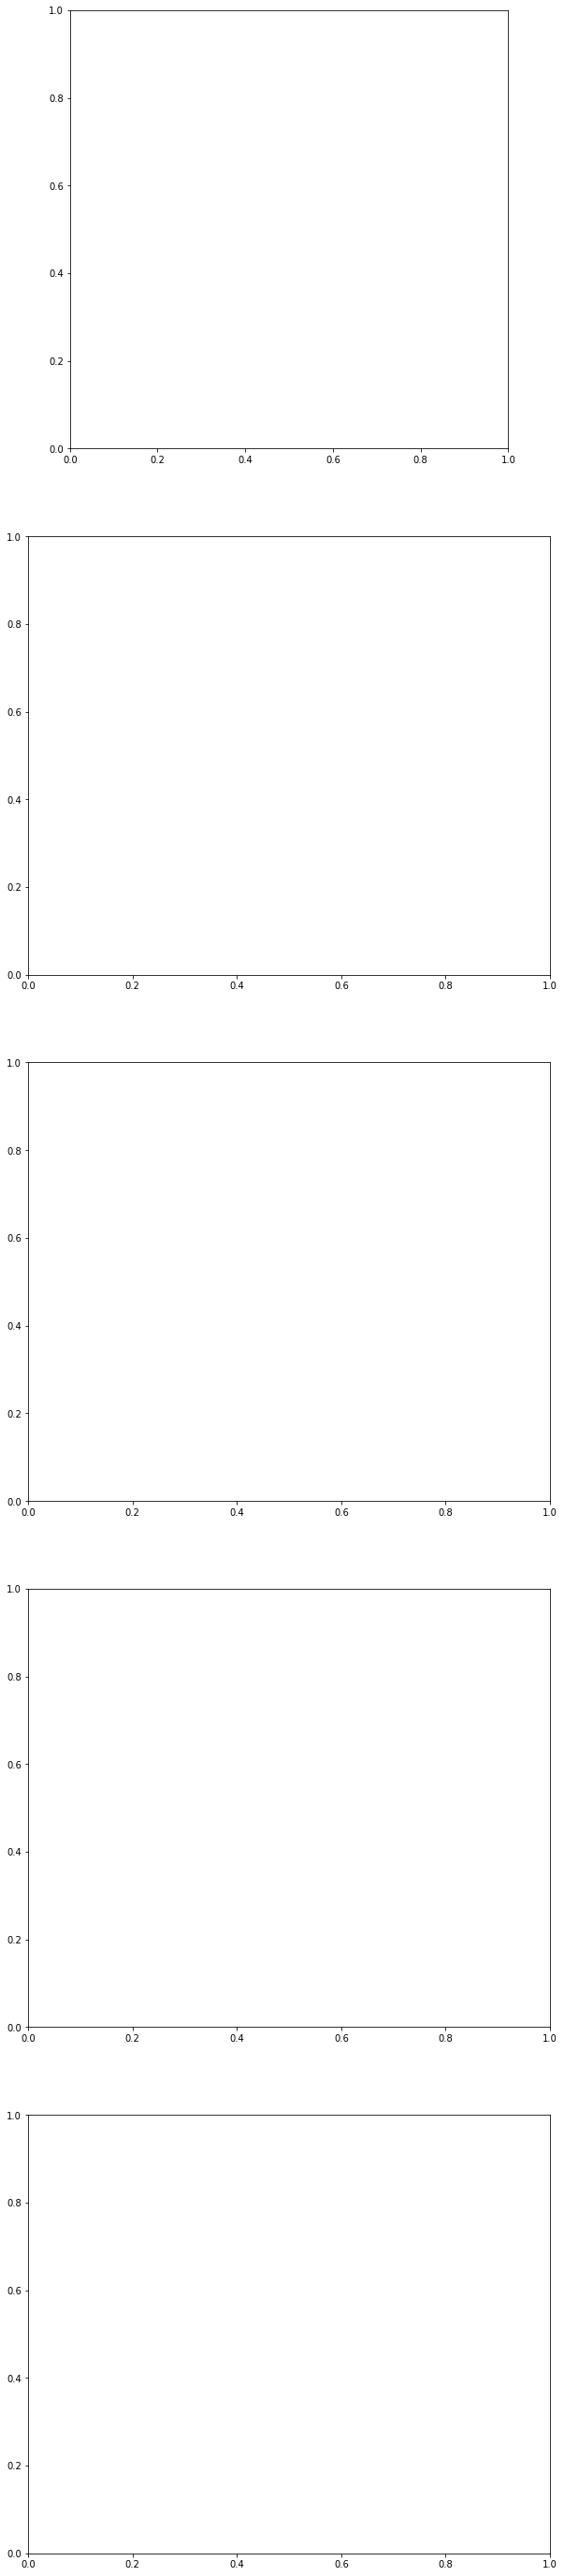

In [157]:

data = [24, 6, 6, 36, 28]
label = words

figure, axes = plt.subplots(nrows=5, figsize=(10,50))

for j in range(5):

    axes[j].pie(list(data_percents.iloc[:j]), labels=label, autopct='%1.1f%%')
plt.show()
